In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import multilabel_confusion_matrix, precision_score,recall_score, accuracy_score,ConfusionMatrixDisplay

In [2]:
#procesamiento de datos
df=pd.read_csv("./Datos.csv")
df=df.drop(columns=["Unnamed: 0.1"]) 
df=pd.concat([df.loc[df["Unnamed: 0"]>=75,:]],ignore_index=True)
df=df.drop(columns=["Unnamed: 0","Thumb","Index","Middle","Ring","Pinkie"]) 

In [3]:
train_data, test_data = train_test_split(df, train_size=0.7, random_state=20, stratify=df["Gesto"])
test_data, dev_data = train_test_split(test_data, train_size=(2/3), random_state=20, stratify=test_data["Gesto"])
print("distribucion de gestos set entrenamiento:")
print(train_data["Gesto"].value_counts())
print("distribucion de gestos set test:")
print(test_data["Gesto"].value_counts())
print("distribucion de gestos set dev:")
print(dev_data["Gesto"].value_counts())

distribucion de gestos set entrenamiento:
1.0    4802
5.0    4796
7.0    4794
6.0    4786
4.0    4782
2.0    4773
3.0    4765
Name: Gesto, dtype: int64
distribucion de gestos set test:
1.0    1372
5.0    1371
7.0    1369
6.0    1367
4.0    1367
2.0    1364
3.0    1361
Name: Gesto, dtype: int64
distribucion de gestos set dev:
1.0    686
5.0    685
7.0    685
6.0    684
4.0    683
2.0    682
3.0    681
Name: Gesto, dtype: int64


           emg1      emg2      emg3      emg4      emg5      emg6      emg7  \
emg1   1.000000  0.510345  0.175451  0.229999  0.362480  0.236605  0.196444   
emg2   0.510345  1.000000  0.688511  0.290321  0.417343  0.311875  0.552739   
emg3   0.175451  0.688511  1.000000  0.499707  0.301870  0.231281  0.443357   
emg4   0.229999  0.290321  0.499707  1.000000  0.527773  0.232577  0.302326   
emg5   0.362480  0.417343  0.301870  0.527773  1.000000  0.678284  0.488011   
emg6   0.236605  0.311875  0.231281  0.232577  0.678284  1.000000  0.607909   
emg7   0.196444  0.552739  0.443357  0.302326  0.488011  0.607909  1.000000   
emg8   0.388603  0.457536  0.431690  0.323730  0.391791  0.401938  0.674977   
Gesto -0.101468 -0.258051 -0.314120 -0.128419 -0.049982  0.007132 -0.169171   

           emg8     Gesto  
emg1   0.388603 -0.101468  
emg2   0.457536 -0.258051  
emg3   0.431690 -0.314120  
emg4   0.323730 -0.128419  
emg5   0.391791 -0.049982  
emg6   0.401938  0.007132  
emg7   0.6749

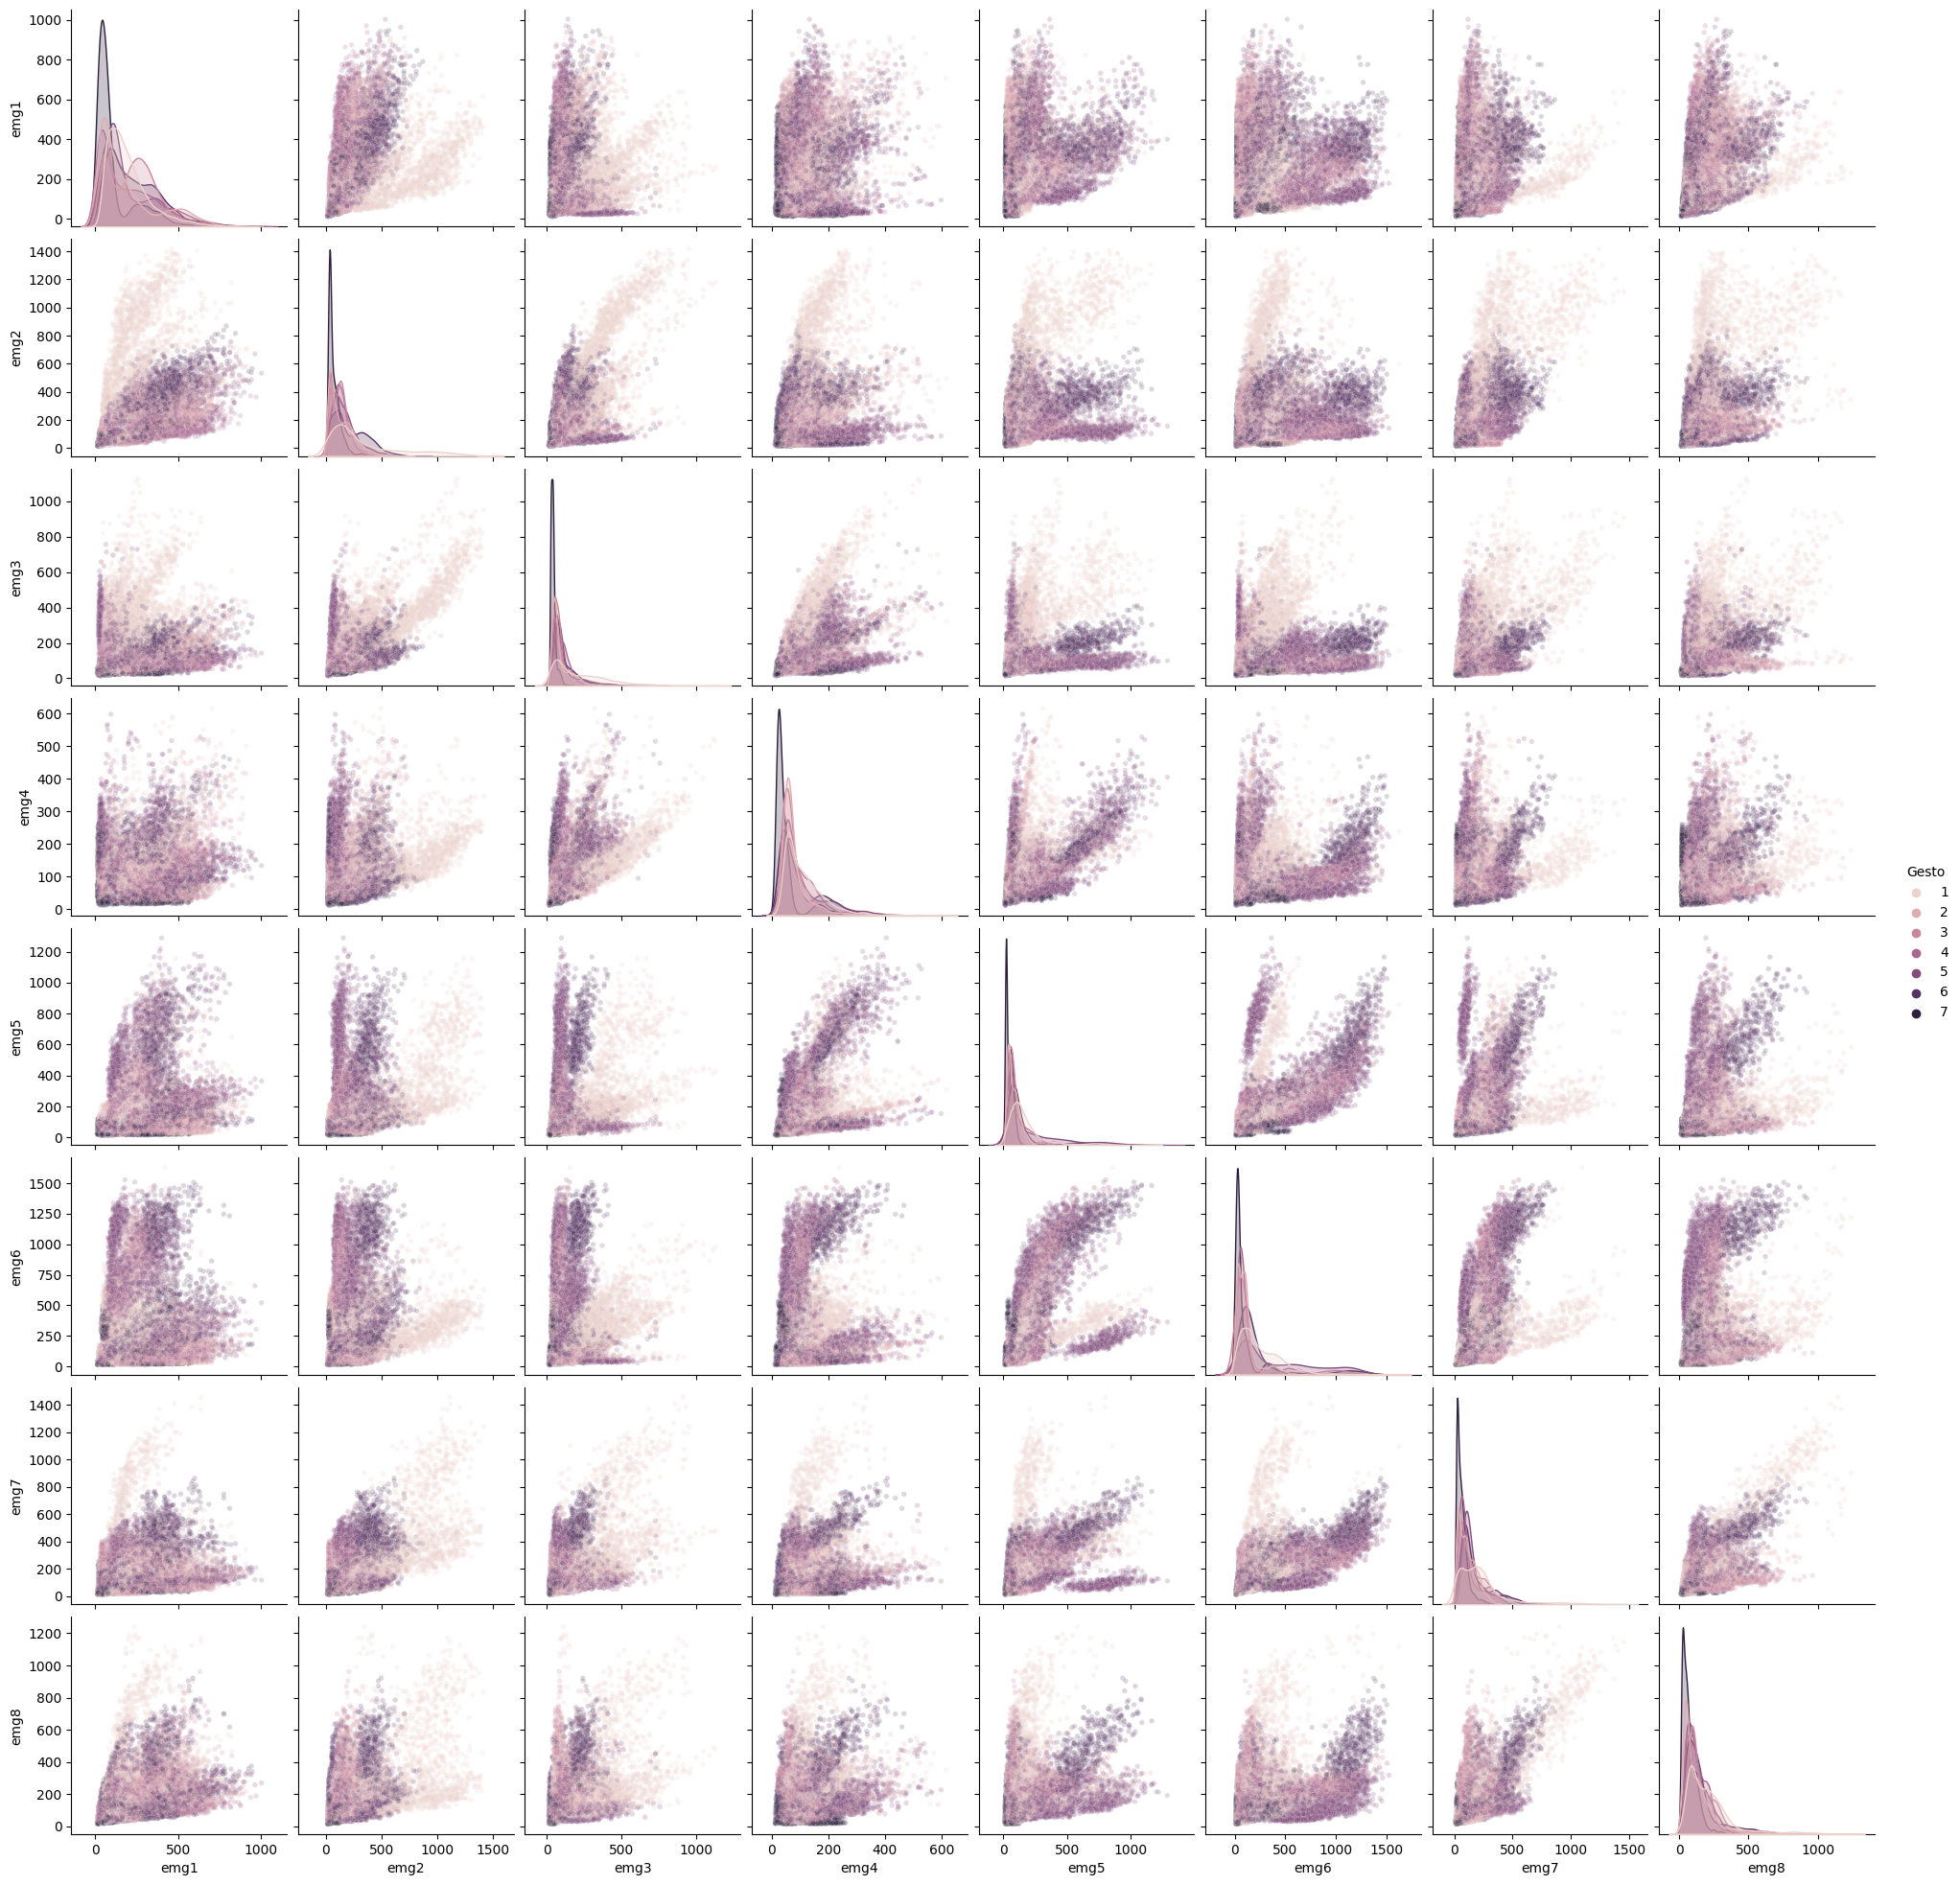

In [4]:
#%% Matriz de correlacion
sns.pairplot(train_data, hue='Gesto',plot_kws = {'alpha': 0.2, 's': 15})
corr_matrix = train_data.corr()
print(corr_matrix)

In [4]:
Sensor_tr=train_data.drop(["Gesto"],axis=1)
Gesto_t=train_data["Gesto"].copy()
Sensor_ts=test_data.drop(["Gesto"],axis=1)
Gesto_s=test_data["Gesto"].copy()
def dedo(n):
    return lambda x: (x==n or x==1)*1
a=dedo(2)
b=dedo(3)
c=dedo(4)
d=dedo(5)
e=dedo(6)
Gesto_tr=pd.DataFrame([])
Gesto_ts=pd.DataFrame([])
Gesto_tr["pul"]=Gesto_t.transform([a])
Gesto_tr["ind"]=Gesto_t.transform([b])
Gesto_tr["mid"]=Gesto_t.transform([c])
Gesto_tr["anl"]=Gesto_t.transform([d])
Gesto_tr["pin"]=Gesto_t.transform([e])
Gesto_ts["pul"]=Gesto_s.transform([a])
Gesto_ts["ind"]=Gesto_s.transform([b])
Gesto_ts["mid"]=Gesto_s.transform([c])
Gesto_ts["anl"]=Gesto_s.transform([d])
Gesto_ts["pin"]=Gesto_s.transform([e])


[[[23171   752]
  [ 1717  7858]]

 [[22906  1025]
  [ 1330  8237]]

 [[22933   981]
  [ 1622  7962]]

 [[23218   682]
  [ 1481  8117]]

 [[22926   984]
  [ 1030  8558]]]
Acurracy MLP: 0.7616758959356389
Acurracy RF: 0.2973565980566294


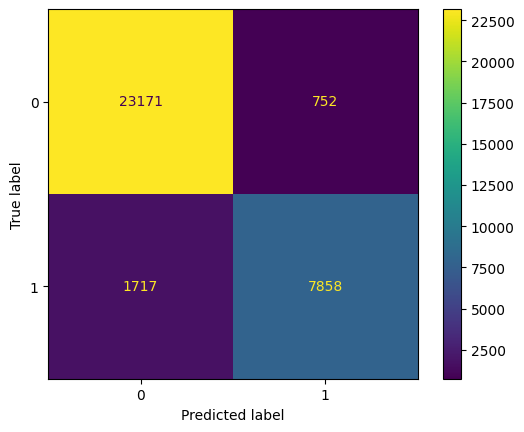

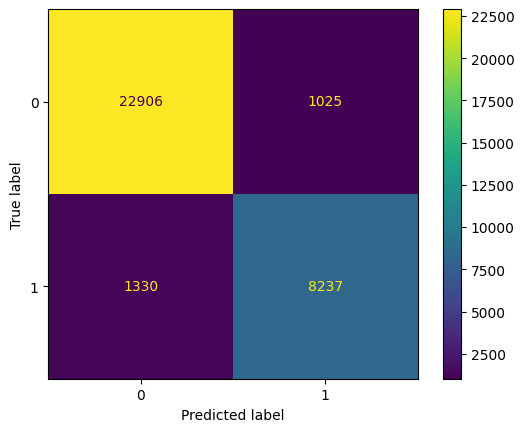

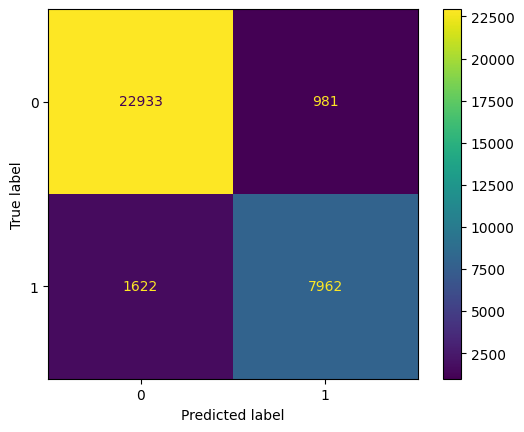

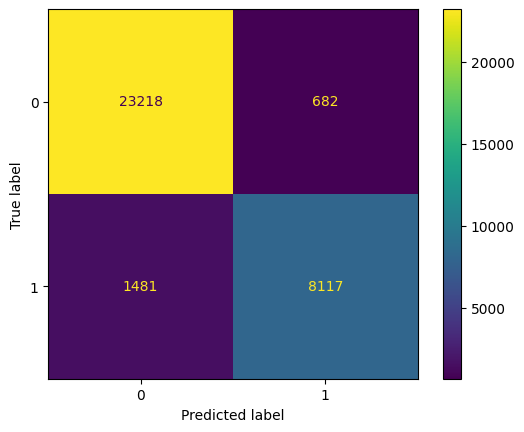

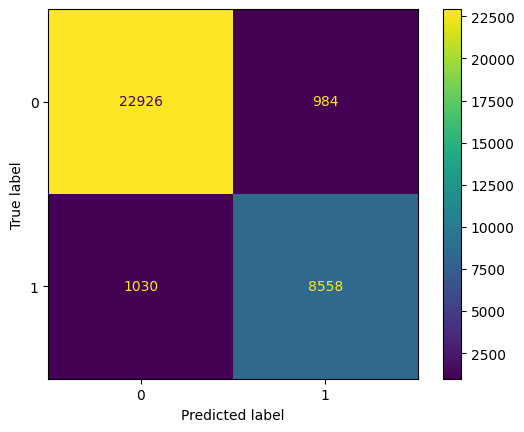

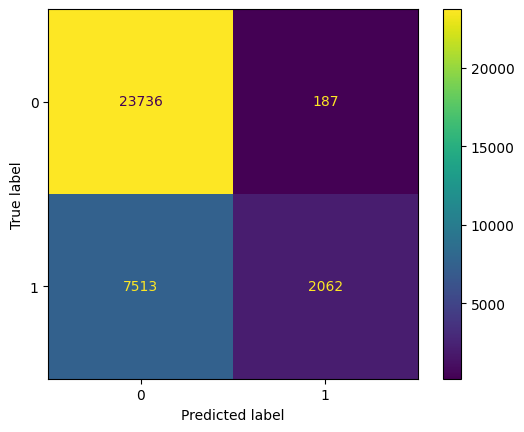

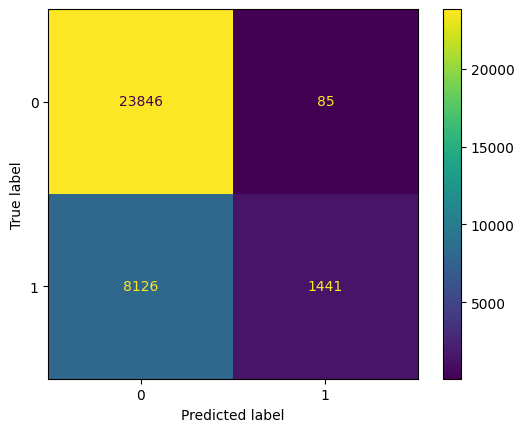

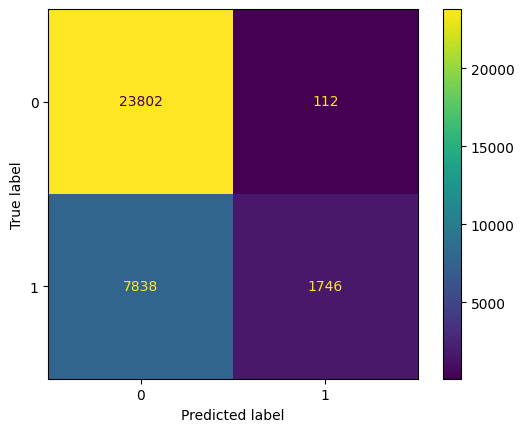

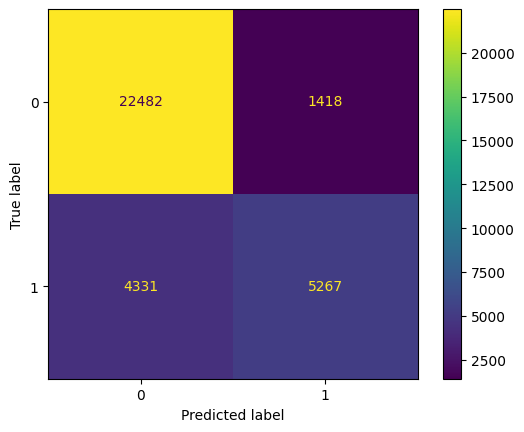

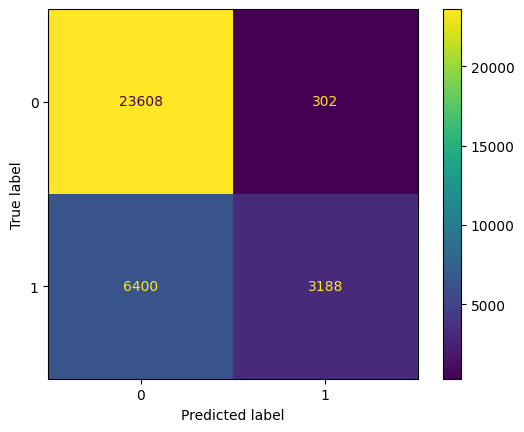

In [6]:

MLP=MultiOutputClassifier(MLPClassifier(random_state=1,hidden_layer_sizes=50))
Gesto_cv_MLP=cross_val_predict(MLP,Sensor_tr,Gesto_tr,cv=5)
MLP.fit(Sensor_tr,Gesto_tr)
MLP_cm = multilabel_confusion_matrix(Gesto_tr,Gesto_cv_MLP)

for i in range(5):
    disp2 = ConfusionMatrixDisplay(confusion_matrix=MLP_cm[i,:,:])
    disp2.plot()
print(f"Acurracy MLP: {MLP.score(Sensor_ts,Gesto_ts)}")

RF= MultiOutputClassifier(RandomForestClassifier(max_depth=4))
Gesto_cv_RF=cross_val_predict(RF,Sensor_tr,Gesto_tr,cv=5)
RF.fit(Sensor_tr,Gesto_tr)
RF_cm = multilabel_confusion_matrix(Gesto_tr,Gesto_cv_RF)
for i in range(5):
    disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm[i,:,:])
    disp.plot()
print(f"Acurracy RF: {RF.score(Sensor_ts,Gesto_ts)}")


array([[23171,   752],
       [ 1717,  7858]], dtype=int64)